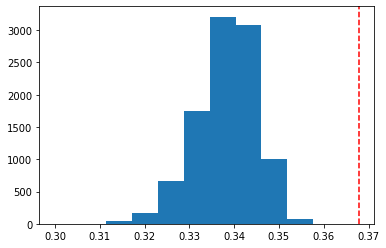

In [5]:
from numpy import sqrt, exp
import random
from matplotlib import pyplot as plt

num_samples = 10000

mean = 0.3748
std = sqrt(mean * (1 - mean) / 1000)
rank = 72

samples = []
for _ in range(num_samples):
    candidates = []
    for __ in range(rank):
        candidates.append(random.gauss(mean, std))
    
    samples.append(min(candidates))
    
def plot(results, fname=None):
    f, ax = plt.subplots()
    ax.hist(results, range = (min(float(exp(-1)), min(results)), max(results)))
    ax.axvline(x=float(exp(-1)), color = 'r', linestyle='dashed')
    if fname: plt.savefig(fname)
    plt.show()
    
plot(samples)

Text(0, 0.5, 'Value of c(n, k)')

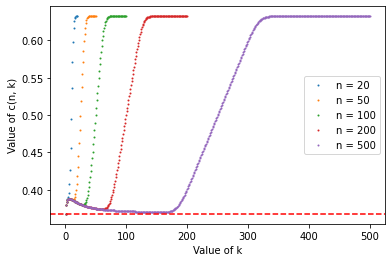

In [27]:
import math

import matplotlib

p = exp(-1)

matplotlib.rcParams['lines.linewidth'] = 1.5

cterm = lambda j, n, k: math.comb(j - 2, k - 1) * (p ** k) * (1 - p) ** (j - k) * min(1, k / (j - k))
dterm = lambda j, n, k: math.comb(n - 1, j) * (p ** j) * (1 - p) ** (n - j) * min(1, k / (n - j))

C = lambda n, k: sum([cterm(j, n, k) for j in range(k + 1, n + 1)])
D = lambda n, k: sum([dterm(j, n, k) for j in range(0, k)])

E = lambda n, k: C(n, k) + D(n, k)

f, ax = plt.subplots()

n = 20
ax.scatter(range(1, n + 1), [E(n, k) for k in range(1, n + 1)], s=1, label="n = {}".format(n))

n = 50
ax.scatter(range(1, n + 1), [E(n, k) for k in range(1, n + 1)], s=1, label="n = {}".format(n))

n = 100
ax.scatter(range(1, n + 1), [E(n, k) for k in range(1, n + 1)], s=1, label="n = {}".format(n))

n = 200
ax.scatter(range(1, n + 1), [E(n, k) for k in range(1, n + 1)], s=1, label="n = {}".format(n))

n = 500
ax.scatter(range(1, n + 1), [E(n, k) for k in range(1, n + 1)], s=1, label="n = {}".format(n))

ax.axhline(y=float(exp(-1)), color = 'r', linestyle='dashed')
ax.legend()
ax.set_xlabel(r'Value of $k$')
ax.set_ylabel(r'Value of $c(n, k)$')

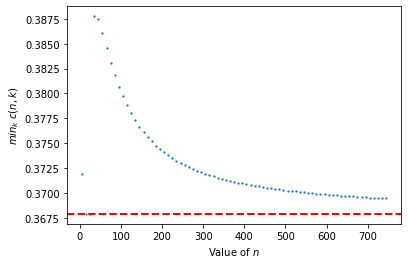

In [47]:
def argmin(n):
    left_range = int(math.floor(0.15 * n)) if n > 30 else 1
    right_range = int(math.ceil(0.45 * n)) if n > 30 else n + 1
    
    return min([E(n, k) for k in range(left_range, right_range)])

matplotlib.rcParams['lines.linewidth'] = 2

f, ax = plt.subplots()
min_n = 5
max_n = 750
step = 10
ax.scatter(range(min_n, max_n + 1, step), [argmin(n) for n in range(min_n, max_n + 1, step)], s=1.5)
ax.set_xlabel(r'Value of $n$')
ax.set_ylabel(r'$min_k ~ c(n, k)$')
ax.axhline(y=float(exp(-1)), color = 'r', linestyle='dashed')